170498071/170498071 [==============================] - 6s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


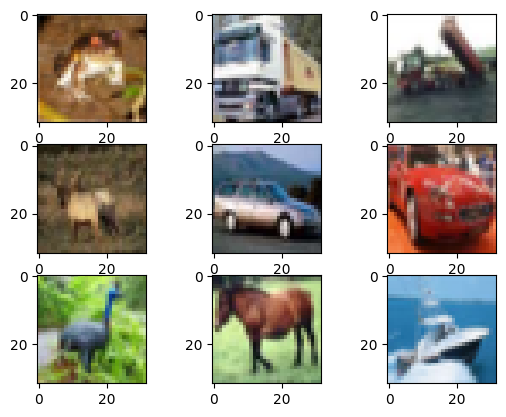

In [1]:
import os
import shutil
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot
from keras.datasets import cifar10

# Load dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Scale images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Perform one-hot encoding on labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

# Plot first few images
for i in range(9):
    # Define subplot
    pyplot.subplot(330 + 1 + i)
    # Plot raw pixel data
    pyplot.imshow(train_images[i])

# Show the figure
pyplot.show()


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding = 'same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3),padding = 'same', activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),padding = 'same', activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.2),
    tf.keras.layers.Conv2D(256, (5,5),padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(256, (5,5),padding = 'same', activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.2),
    tf.keras.layers.Flatten(), 
    # 128 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')  
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        1

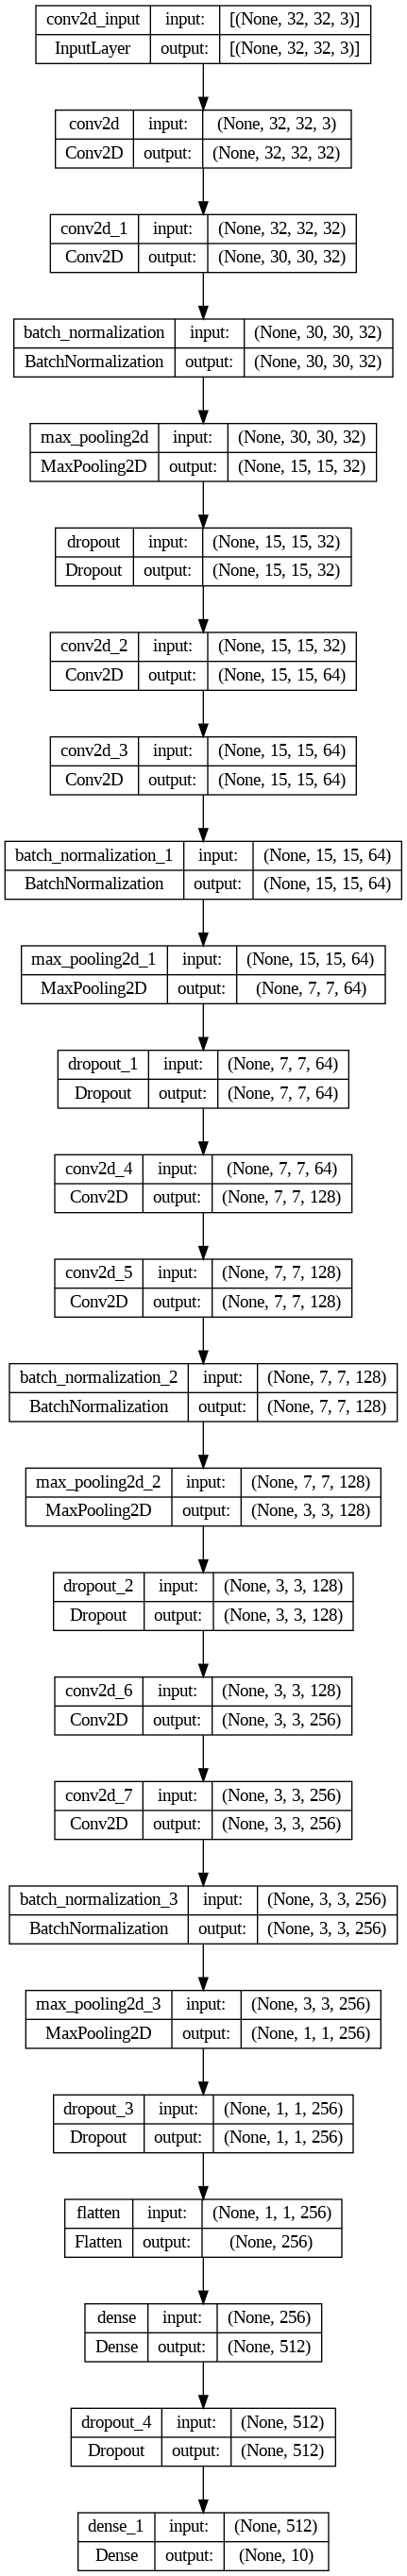

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

Our Model Visualized through VisualKeras

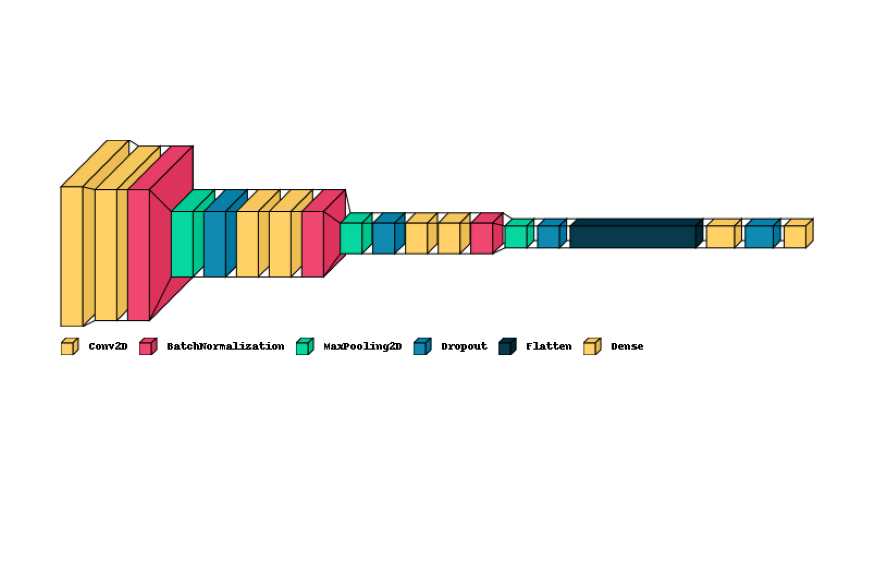


In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

train_generator = train_datagen.flow(
    x=train_images,
    y=train_labels,
    batch_size=32)

val_generator = val_datagen.flow(
    
    x=test_images,
    y=test_labels,
    batch_size=32)

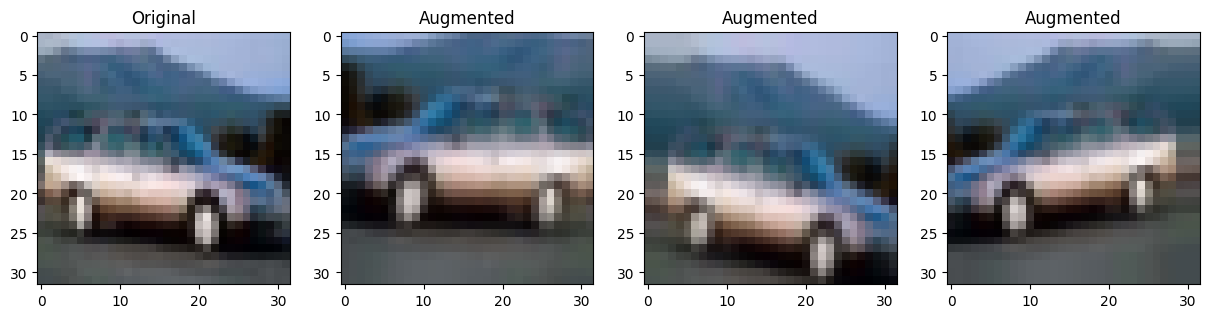

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

image_index = 4  # Index of the image to use
selected_image = train_images[image_index]

# Apply augmentation to the selected image
img_arr = selected_image
img_arr = img_arr.reshape((1,) + img_arr.shape)
aug_image = train_datagen.flow(img_arr, batch_size=1)

# Display the original and augmented versions
plt.figure(figsize=(15, 8))
plt.subplot(141)
plt.imshow(selected_image)
plt.title("Original")

i = 2
for batch in aug_image:
    plt.subplot(14 * 10 + i)
    plt.imshow(batch[0].astype('float32'))
    plt.title("Augmented")
    i += 1
    if i % 5 == 0:
        break

plt.show()


In [6]:
from tensorflow.keras.optimizers import RMSprop,Adam

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [8]:
history = model.fit(
            train_generator,
            epochs=200,
            validation_data=val_generator,
            verbose=1
            )

Epoch 1/200
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5925 - accuracy: 0.4217 - val_loss: 1.3911 - val_accuracy: 0.5091
Epoch 2/200
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1871 - accuracy: 0.5793 - val_loss: 1.3008 - val_accuracy: 0.5757
Epoch 3/200
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0067 - accuracy: 0.6512 - val_loss: 1.0849 - val_accuracy: 0.6439
Epoch 4/200
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8960 - accuracy: 0.6932 - val_loss: 0.9662 - val_accuracy: 0.6764
Epoch 5/200
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8267 - accuracy: 0.7154 - val_loss: 0.8883 - val_accuracy: 0.7040
Epoch 6/200
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7670 - accuracy: 0.7364 - val_loss: 0.6508 - val_accuracy: 0.7793
Epoch 7/200
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7208 - accuracy: 0.7543 - val_loss: 0

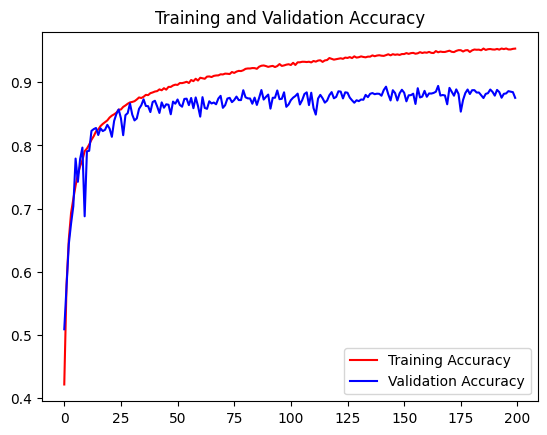

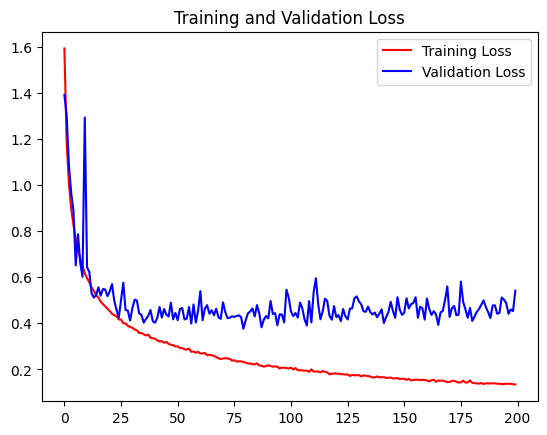

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

LET'S GIVE AN INPUT TO TEST OUR MODEL
EX: A FROG


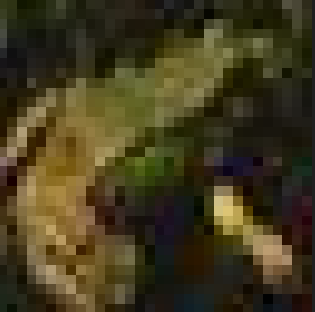

In [10]:

import tensorflow as tf
import numpy as np
from PIL import Image
from google.colab import files


# Upload the image
uploaded = files.upload()

filename = next(iter(uploaded))
# load the image
img = tf.keras.preprocessing.image.load_img(filename, target_size=(32, 32))
# convert to array
img = tf.keras.preprocessing.image.img_to_array(img)
# reshape into a single sample with 3 channels
img = img.reshape(1, 32, 32, 3)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0

result = model.predict(img)
predicted_class = np.argmax(result)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Predicted class:", predicted_class)

Saving 0006 (2).jpg to 0006 (2).jpg
1/1 [==============================] - 0s 459ms/step
Predicted class: 6


ANOTHER EXAMPLE:A PLANE

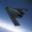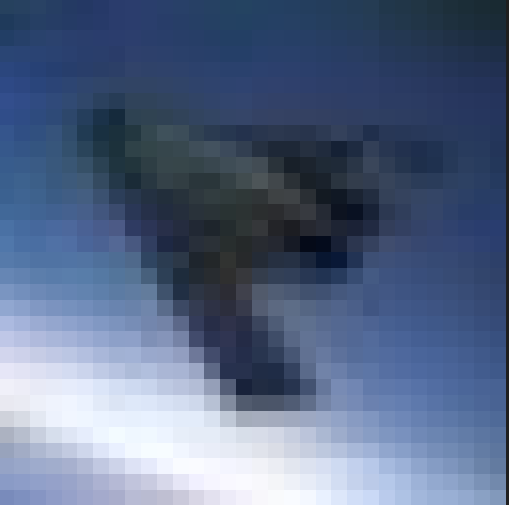

In [11]:

import tensorflow as tf
import numpy as np
from PIL import Image
from google.colab import files


# Upload the image
uploaded = files.upload()

filename = next(iter(uploaded))
# load the image
img = tf.keras.preprocessing.image.load_img(filename, target_size=(32, 32))
# convert to array
img = tf.keras.preprocessing.image.img_to_array(img)
# reshape into a single sample with 3 channels
img = img.reshape(1, 32, 32, 3)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0

result = model.predict(img)
predicted_class = np.argmax(result)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Predicted class:", predicted_class)

Saving 0014.jpg to 0014.jpg
1/1 [==============================] - 0s 20ms/step
Predicted class: 0


LAST EXAMPLE: A DOG


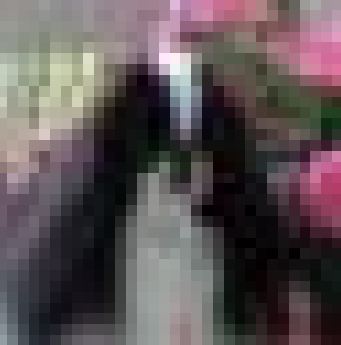

In [12]:

import tensorflow as tf
import numpy as np
from PIL import Image
from google.colab import files


# Upload the image
uploaded = files.upload()

filename = next(iter(uploaded))
# load the image
img = tf.keras.preprocessing.image.load_img(filename, target_size=(32, 32))
# convert to array
img = tf.keras.preprocessing.image.img_to_array(img)
# reshape into a single sample with 3 channels
img = img.reshape(1, 32, 32, 3)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0

result = model.predict(img)
predicted_class = np.argmax(result)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Predicted class:", predicted_class)

Saving 0006 (1).jpg to 0006 (1).jpg
1/1 [==============================] - 0s 19ms/step
Predicted class: 5
